Using device: cpu
State shape: (4,)
Number of actions: 2
Episode 1	Average Score: 10.00	Epsilon: 0.99
Episode 2	Average Score: 12.00	Epsilon: 0.99
Episode 3	Average Score: 18.00	Epsilon: 0.99
Episode 4	Average Score: 17.25	Epsilon: 0.98
Episode 5	Average Score: 25.40	Epsilon: 0.98
Episode 6	Average Score: 23.33	Epsilon: 0.97
Episode 7	Average Score: 27.29	Epsilon: 0.97
Episode 8	Average Score: 26.12	Epsilon: 0.96
Episode 9	Average Score: 28.56	Epsilon: 0.96
Episode 10	Average Score: 27.30	Epsilon: 0.95
Episode 11	Average Score: 26.00	Epsilon: 0.95
Episode 12	Average Score: 25.17	Epsilon: 0.94
Episode 13	Average Score: 24.62	Epsilon: 0.94
Episode 14	Average Score: 23.86	Epsilon: 0.93
Episode 15	Average Score: 28.13	Epsilon: 0.93
Episode 16	Average Score: 27.06	Epsilon: 0.92
Episode 17	Average Score: 27.00	Epsilon: 0.92
Episode 18	Average Score: 26.11	Epsilon: 0.91
Episode 19	Average Score: 25.42	Epsilon: 0.91
Episode 20	Average Score: 24.85	Epsilon: 0.90
Episode 21	Average Score: 24.29	

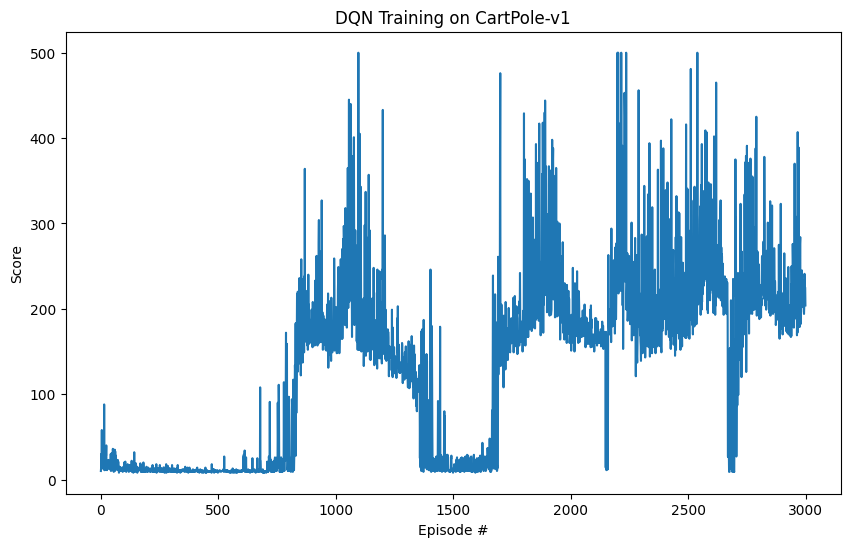

Episode 1: Total Reward = 161.0
Episode 2: Total Reward = 165.0
Episode 3: Total Reward = 164.0
Episode 4: Total Reward = 163.0
Episode 5: Total Reward = 155.0
Episode 6: Total Reward = 152.0
Episode 7: Total Reward = 157.0
Episode 8: Total Reward = 167.0
Episode 9: Total Reward = 163.0
Episode 10: Total Reward = 166.0


In [ ]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import deque, namedtuple
import random
import time

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# HOMEWORK TASK:
# Define the neural network architecture for the DQN agent
# This network approximates the Q-function: it takes a state as input and outputs Q-values for each possible action

class DQN(nn.Module):
    """
    Your task is to implement a neural network for Deep Q-Learning with the following specifications:

    Input parameters:
    - state_size: Integer, dimension of each state (4 for CartPole: position, velocity, angle, angular velocity)
    - action_size: Integer, number of possible actions (2 for CartPole: left or right)
    - hidden_size: Integer, number of neurons in each hidden layer (default=64)

    Required structure:
    1. Create a fully connected neural network with at least 2 hidden layers
    2. Use appropriate activation functions between layers (consider ReLU, but you may experiment)
    3. The output layer should have 'action_size' neurons with no activation function
       (raw Q-values will be output directly)

    Implementation notes:
    - Inherit from nn.Module
    - Initialize layers in __init__ method
    - Implement the forward pass in the forward method
    - Make sure dimensions align properly between layers
    - Consider whether bias terms should be used

    Expected behavior:
    - Given a state tensor of shape (batch_size, state_size), the network should return
      a tensor of shape (batch_size, action_size) containing Q-values for each action
    """

    # YOUR CODE HERE

    # Remember to include both __init__ and forward methods

# Define a experience replay buffer
Experience = namedtuple('Experience', field_names=['state', 'action', 'reward', 'next_state', 'done'])

class ReplayBuffer:
    def __init__(self, capacity=10000):
        self.buffer = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done):
        experience = Experience(state, action, reward, next_state, done)
        self.buffer.append(experience)

    def sample(self, batch_size):
        experiences = random.sample(self.buffer, k=batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences]).astype(np.uint8)).float().to(device)

        return states, actions, rewards, next_states, dones

    def __len__(self):
        return len(self.buffer)

# Define the DQN Agent
class DQNAgent:
    def __init__(self, state_size, action_size, hidden_size=64, lr=1e-3, gamma=0.99, batch_size=64, update_every=4):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = gamma  # discount factor
        self.batch_size = batch_size
        self.update_every = update_every
        self.tau = 1e-3  # for soft update of target network

        # Q-Networks (online and target)
        self.policy_net = DQN(state_size, action_size, hidden_size).to(device)
        self.target_net = DQN(state_size, action_size, hidden_size).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        self.target_net.eval()  # target network is used for evaluation only

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=lr)
        self.memory = ReplayBuffer()
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Learn every update_every time steps
        self.t_step = (self.t_step + 1) % self.update_every
        if self.t_step == 0 and len(self.memory) > self.batch_size:
            experiences = self.memory.sample(self.batch_size)
            self.learn(experiences)

    def act(self, state, eps=0.0):
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.policy_net.eval()
        with torch.no_grad():
            action_values = self.policy_net(state)
        self.policy_net.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

def learn(self, experiences):
    # HOMEWORK TASK:
    # Complete the DQN learning function by implementing the Q-learning update.

    # Input variables:
    # states: Tensor of shape (batch_size, state_size) containing current states
    # actions: Tensor of shape (batch_size, 1) containing indices of actions taken
    # rewards: Tensor of shape (batch_size, 1) containing rewards received after taking actions
    # next_states: Tensor of shape (batch_size, state_size) containing the resulting next states
    # dones: Tensor of shape (batch_size, 1) containing binary flags (1 if episode terminated, 0 otherwise)

    # Your task is to:
    # 1. Calculate Q-values for next states using the target network
    # 2. Compute the target Q-values using the Bellman equation: reward + gamma * max(Q_next) * (1-done)
    # 3. Get the current Q-value estimates from the policy network for the actions taken
    # 4. Compute the loss (Mean Squared Error) between current estimates and target values
    # 5. Prepare the optimizer by zeroing gradients

    # HINT: Use self.target_net for next state predictions and self.policy_net for current state predictions
    # HINT: For selecting specific Q-values corresponding to taken actions, look up torch.gather()
    # HINT: Remember to detach target values from the computation graph since we don't want to backpropagate through them

    # YOUR CODE HERE

    loss.backward()
    self.optimizer.step()

    # Update target network (soft update)
    self.soft_update()

    def soft_update(self):
        for target_param, policy_param in zip(self.target_net.parameters(), self.policy_net.parameters()):
            target_param.data.copy_(self.tau * policy_param.data + (1.0 - self.tau) * target_param.data)

# Function to train the agent
def train_dqn(env, agent, n_episodes=3000, max_t=3000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    eps = eps_start

    for i_episode in range(1, n_episodes+1):
        state, _ = env.reset()
        score = 0

        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            agent.step(state, [action], reward, next_state, done)
            state = next_state
            score += reward

            if done:
                break

        scores.append(score)
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon

        # Print progress
        print(f'Episode {i_episode}\tAverage Score: {np.mean(scores[-100:]):.2f}\tEpsilon: {eps:.2f}')

        # Check if environment is solved
        if np.mean(scores[-100:]) >= 200.0:
            print(f'\nEnvironment solved in {i_episode} episodes!\tAverage Score: {np.mean(scores[-100:]):.2f}')
            torch.save(agent.policy_net.state_dict(), 'checkpoint.pth')
            break

    return scores

# Function to visualize the training process
def plot_scores(scores):
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.title('DQN Training on CartPole-v1')
    plt.show()

# Function to test the trained agent
def test_agent(env, agent, n_episodes=10):
    for i in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0

        for t in range(1000):
            action = agent.act(state)
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward

            # Render the environment (only works in standard Python, not directly in Colab)
            # In Colab, you can use the gym.wrappers.RecordVideo wrapper to save videos
            # env.render()

            if done:
                break

        print(f'Episode {i+1}: Total Reward = {total_reward}')

# Main execution
if __name__ == "__main__":
    # Create the CartPole environment
    env = gym.make('CartPole-v1')
    print('State shape:', env.observation_space.shape)
    print('Number of actions:', env.action_space.n)

    # Initialize the agent
    state_size = env.observation_space.shape[0]   # 4 (cart position, cart velocity, pole angle, pole angular velocity)
    action_size = env.action_space.n              # 2 (push cart left or right)
    agent = DQNAgent(state_size=state_size, action_size=action_size)

    # Train the agent
    start_time = time.time()
    scores = train_dqn(env, agent)
    end_time = time.time()
    print(f'Training completed in {end_time - start_time:.2f} seconds')

    # Plot the scores
    plot_scores(scores)

    # Test the trained agent
    # Note: To visualize in Colab, you'll need to use a wrapper like RecordVideo
    test_env = gym.make('CartPole-v1')
    test_agent(test_env, agent)

    # Close environments
    env.close()
    test_env.close()